In [2]:
import numpy as np                 # Linear Algebra
import pandas as pd                # Data preprocessing  
import seaborn as sns              # Ploting
import matplotlib.pyplot as plt    
from matplotlib.figure import Figure
                                   # Ploting
%matplotlib inline


# Import statement required for Plotly
#import plotly.offline as py


In [3]:
# import data
df = pd.read_csv('employee_reviews.csv', delimiter = ',', index_col = 0)
df.FataFrame = 'employee_reviews.csv'

In IBM, there are 1470 samples, 237 emplyees who compose 16% of the total number of employee left the company for some reasons. Besides that, 1233 employee is currently continuing to work in the same company.

# Exploratory Data Analysis

In [4]:
data = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [5]:
# show the head of the data
df.head()

,company,location,dates,job-title,summary,pros,cons,advice-to-mgmt,overall-ratings,work-balance-stars,culture-values-stars,carrer-opportunities-stars,comp-benefit-stars,senior-mangemnet-stars,helpful-count,link
1,google,none,"Dec 11, 2018",Current Employee - Anonymous Employee,Best Company to work for,People are smart and friendly,Bureaucracy is slowing things down,none,5.0,4.0,5.0,5.0,4.0,5.0,0,https://www.glassdoor.com/Reviews/Google-Revie...
2,google,"Mountain View, CA","Jun 21, 2013",Former Employee - Program Manager,"Moving at the speed of light, burn out is inev...","1) Food, food, food. 15+ cafes on main campus ...",1) Work/life balance. What balance? All those ...,1) Don't dismiss emotional intelligence and ad...,4.0,2.0,3.0,3.0,5.0,3.0,2094,https://www.glassdoor.com/Reviews/Google-Revie...
3,google,"New York, NY","May 10, 2014",Current Employee - Software Engineer III,Great balance between big-company security and...,"* If you're a software engineer, you're among ...","* It *is* becoming larger, and with it comes g...",Keep the focus on the user. Everything else wi...,5.0,5.0,4.0,5.0,5.0,4.0,949,https://www.glassdoor.com/Reviews/Google-Revie...
4,google,"Mountain View, CA","Feb 8, 2015",Current Employee - Anonymous Employee,The best place I've worked and also the most d...,You can't find a more well-regarded company th...,I live in SF so the commute can take between 1...,Keep on NOT micromanaging - that is a huge ben...,5.0,2.0,5.0,5.0,4.0,5.0,498,https://www.glassdoor.com/Reviews/Google-Revie...
5,google,"Los Angeles, CA","Jul 19, 2018",Former Employee - Software Engineer,"Unique, one of a kind dream job",Google is a world of its own. At every other c...,"If you don't work in MTV (HQ), you will be giv...",Promote managers into management for their man...,5.0,5.0,5.0,5.0,5.0,5.0,49,https://www.glassdoor.com/Reviews/Google-Revie...


In [6]:
# data description
df.describe()

,overall-ratings,helpful-count
count,67529.000000,67529.000000
mean,3.826075,1.268211
std,1.154989,16.085852
min,1.000000,0.000000
25%,3.000000,0.000000
50%,4.000000,0.000000
75%,5.000000,1.000000
max,5.000000,2094.000000


In [7]:
# dropping colums
df.drop(columns = ['location','dates', 'link','advice-to-mgmt','summary','helpful-count','job-title'], inplace = True)

In [8]:
# renaming columns
df.rename(columns={'overall-ratings':'overall', 'work-balance-stars':'workBalance', 'culture-values-stars':'cultureValue', 'carrer-opportunities-stars':'opportunities', 'senior-mangemnet-stars':'management','comp-benefit-stars':'benefits'}, inplace=True)

In [9]:
# data transformations
df['workBalance'] = np.where(df['workBalance']=='none', 0, df['workBalance'])
df['cultureValue'] = np.where(df['cultureValue']=='none', 0, df['cultureValue'])
df['opportunities'] = np.where(df['opportunities']=='none', 0, df['opportunities'])
df['benefits'] = np.where(df['benefits']=='none', 0, df['benefits'])
df['management'] = np.where(df['management']=='none', 0, df['management'])
df['workBalance'] = pd.to_numeric(df['workBalance'])
df['cultureValue'] = pd.to_numeric(df['cultureValue'])
df['opportunities'] = pd.to_numeric(df['opportunities'])
df['benefits'] = pd.to_numeric(df['benefits'])
df['management'] = pd.to_numeric(df['management'])

In [10]:
# data desciption after dropping unrelated columns and transformations
df.describe

<bound method NDFrame.describe of          company                                               pros  \
1         google                      People are smart and friendly   
2         google  1) Food, food, food. 15+ cafes on main campus ...   
3         google  * If you're a software engineer, you're among ...   
4         google  You can't find a more well-regarded company th...   
5         google  Google is a world of its own. At every other c...   
6         google  People are not that busy, so they are nice to ...   
7         google  Great working environment. Good work life balance   
8         google            work culture, benefits, growth, people,   
9         google  Great products. Vision you can feel good about...   
10        google             Impact driven. Best tech in the world.   
11        google  * Smart people * World class infrastructure * ...   
12        google  * There is endless opportunity * You'll never ...   
13        google  Atmosphere that promotes 

In [11]:
# head of data after dropping unrelated columns and transformations
df.head()

,company,pros,cons,overall,workBalance,cultureValue,opportunities,benefits,management
1,google,People are smart and friendly,Bureaucracy is slowing things down,5.0,4.0,5.0,5.0,4.0,5.0
2,google,"1) Food, food, food. 15+ cafes on main campus ...",1) Work/life balance. What balance? All those ...,4.0,2.0,3.0,3.0,5.0,3.0
3,google,"* If you're a software engineer, you're among ...","* It *is* becoming larger, and with it comes g...",5.0,5.0,4.0,5.0,5.0,4.0
4,google,You can't find a more well-regarded company th...,I live in SF so the commute can take between 1...,5.0,2.0,5.0,5.0,4.0,5.0
5,google,Google is a world of its own. At every other c...,"If you don't work in MTV (HQ), you will be giv...",5.0,5.0,5.0,5.0,5.0,5.0


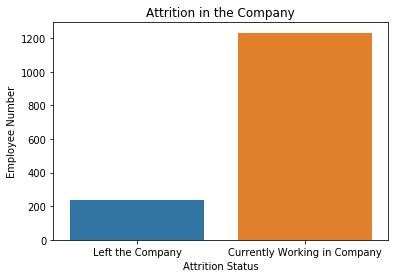

Currently Working in Company    1233
Left the Company                 237
Name: Attrition, dtype: int64

In [12]:
# Drop useless features and rename the dataframe
def inOrLeft(df):
    '''
    plot for statistics whether people in sample quit or still in the company
    drop lables under "over 18", "StandardHours", "EmployeeCount"
    dataframe: attrition
    '''
    assert isinstance(df,pd.DataFrame)
    df2 = df.drop(labels = ['Over18','StandardHours','EmployeeCount'], axis = 1)
    trgt = df2['Attrition'].apply(lambda x: 'Currently Working in Company' if x == 'No' else 'Left the Company')
    sns.countplot(trgt)
    plt.title('Attrition in the Company')
    plt.xlabel('Attrition Status')
    plt.ylabel('Employee Number')
    plt.show()
    return trgt.value_counts()
inOrLeft(data)

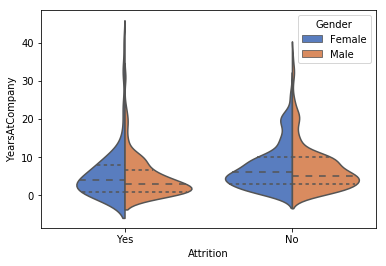

In [13]:
def violin_gender(df):
    '''
    plot violin plots for female and male 
    x: Attrition
    y: Years at company
    hue: gender
    '''
    assert isinstance(df,pd.DataFrame)
    sns.violinplot(x="Attrition", y="YearsAtCompany", hue="Gender", data=df, palette="muted", split=True,
                   inner="quartile")                           
    return plt.show()
violin_gender(data)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


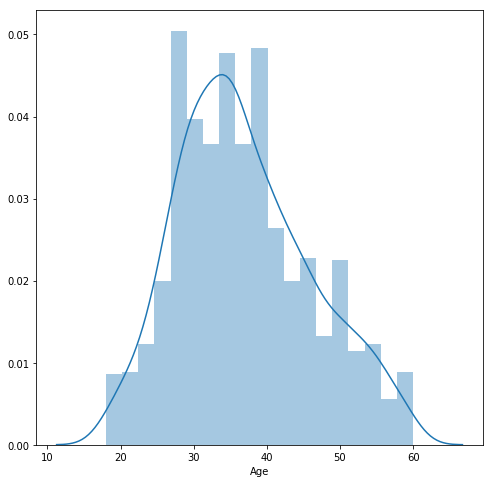

In [14]:
def age(df):
    '''
    age distribution with fitting curve
    '''
    assert isinstance(df,pd.DataFrame)
    fig,ax = plt.subplots(1,1,figsize = (8,8))       # only one plots and set size as 8*8
    sns.distplot(df['Age'])                          # plot by seaborn distplot
    return plt.show()                                
age(data)

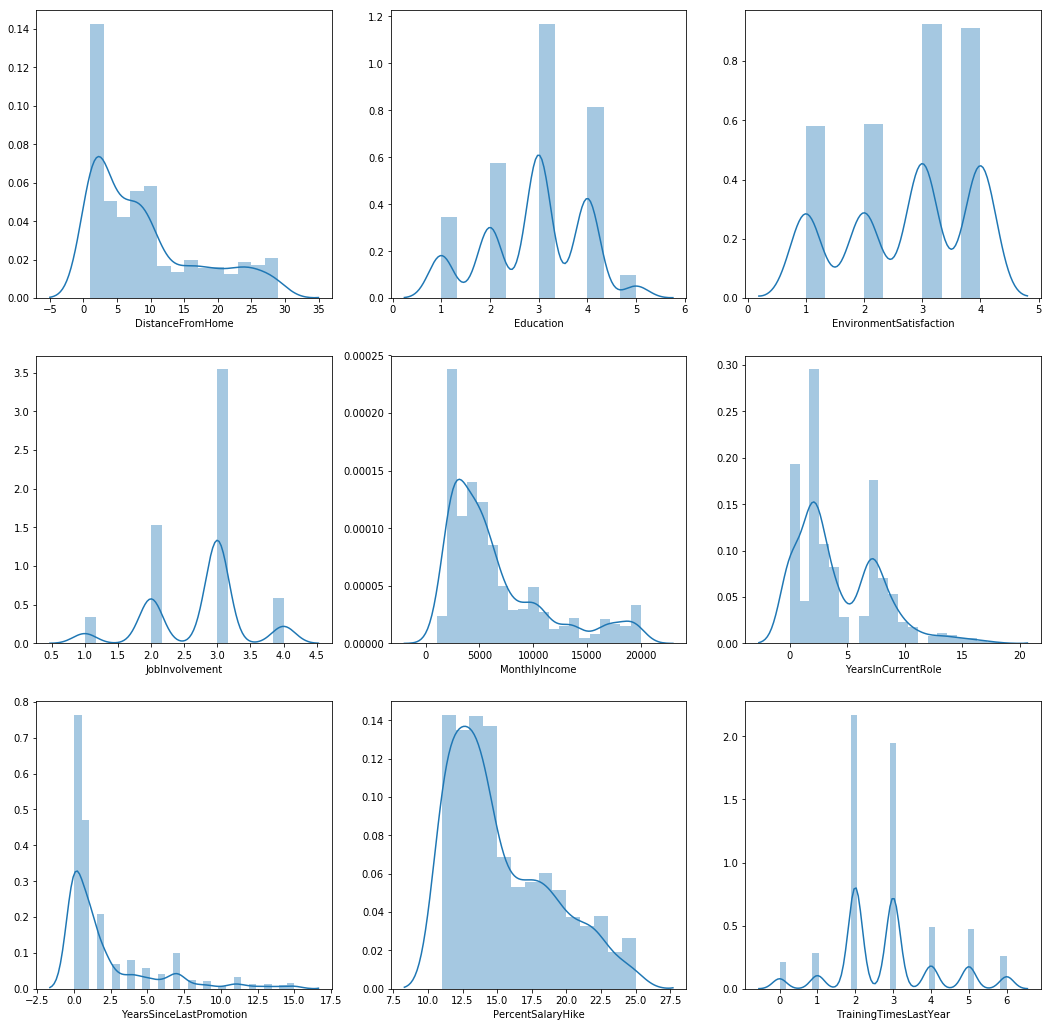

In [15]:
# Plot different feature based on attributes
def subplots(df):
    '''
    plot DistanceFromHome, Education, EnvironmentSatisfaction, JobInvolvement, 
         MonthlyIncome, YearsInCurrentRole, YearsSinceLastPromotion, PercentSalaryHike, TrainingTimesLastYear
    3*3 distplot with curve fitting
    '''
    assert isinstance(df,pd.DataFrame)
    fig,ax = plt.subplots(3,3,figsize = (18,18)) # 3 rows and 3 columns, set figure size as 18 * 18

    sns.distplot(df['DistanceFromHome'], ax = ax[0,0])           # subplot at (1,1)
    sns.distplot(df['Education'], ax = ax[0,1])                  # subplot at (1,2) 
    sns.distplot(df['EnvironmentSatisfaction'], ax = ax[0,2])    # subplot at (1,3)
    sns.distplot(df['JobInvolvement'], ax = ax[1,0])             # subplot at (2,1)
    sns.distplot(df['MonthlyIncome'], ax = ax[1,1])              # subplot at (2,2)
    sns.distplot(df['YearsInCurrentRole'], ax = ax[1,2])         # subplot at (2,3)
    sns.distplot(df['YearsSinceLastPromotion'], ax = ax[2,0])    # subplot at (3,1)
    sns.distplot(df['PercentSalaryHike'], ax = ax[2,1])          # subplot at (3,2)
    sns.distplot(df['TrainingTimesLastYear'], ax = ax[2,2])      # subplot at (3,3)
    return plt.show()                                            # show those 9 subplots

# curve: fitting distribution
subplots(data)

Job Level vs Job Role

In [16]:
# rename data in terms of attrition "yes" or "no"
atr_yes = data[data['Attrition'] == 'Yes']
atr_no = data[data['Attrition'] == 'No']

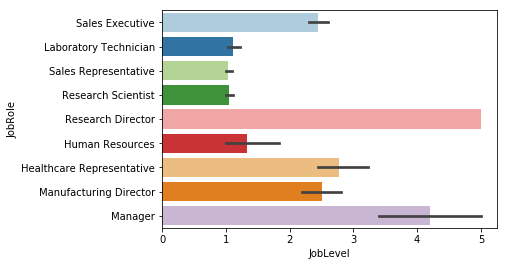

In [17]:
sns.barplot(x = data['JobLevel'], y = atr_yes['JobRole'], palette="Paired")   # seaborn barplot for jobevel and jobRole

Sex and Income

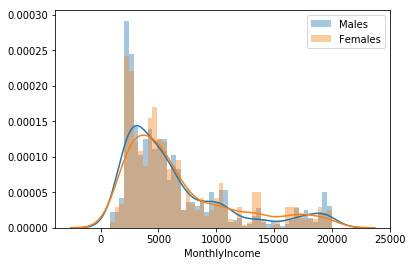

In [18]:
def displotOnSex(df):
    '''
    distplot distribution on MonthlyIncome and Sex
    '''
    assert isinstance(df,pd.DataFrame)
    sns.distplot(df.MonthlyIncome[df.Gender == 'Male'], bins = np.linspace(0, 20000,50))     

    sns.distplot(df.MonthlyIncome[df.Gender == 'Female'], bins = np.linspace(0, 20000,50))

    return plt.legend(['Males', 'Females'])
displotOnSex(data)

Sex and Department

(Text(0.5, 0, 'MonthlyIncome'),
 Text(0.5, 0, 'MonthlyIncome'),
 Text(0.5, 0, 'MonthlyIncome'))

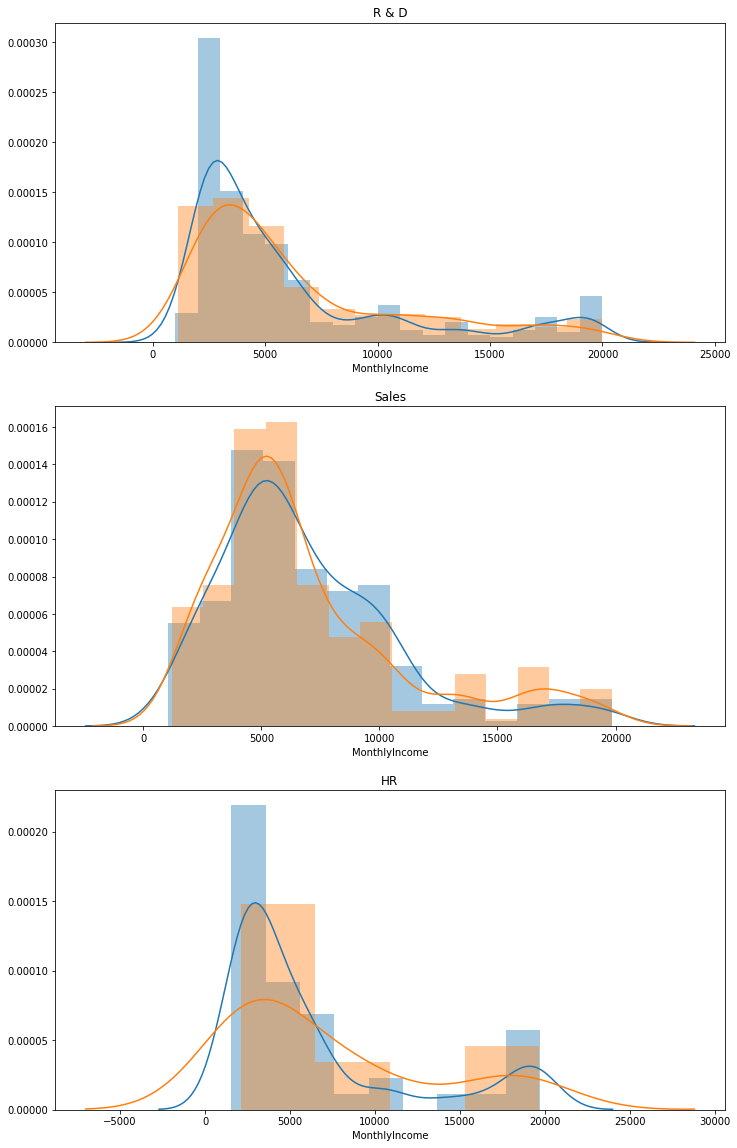

In [19]:
def depart_distribution(df):
    '''
    distribution of MonthlyIncome and Sex under "Research&Development", "Sales", "HR" departemnt
    displot sets and fitting curve
    '''
    assert isinstance(df,pd.DataFrame)
    plt.figure(figsize = (12,20))
    # subplot of R&D
    plt.subplot(3,1,1)
    plt.title('R & D')
    sns.distplot(df.MonthlyIncome[(df.Department == 'Research & Development') & (df.Gender == 'Male')])
    sns.distplot(df.MonthlyIncome[(df.Department == 'Research & Development') & (df.Gender == 'Female')])
    x = plt.xlabel('MonthlyIncome')
    # subplot of Sales
    plt.subplot(3,1,2)
    plt.title('Sales')
    sns.distplot(df.MonthlyIncome[(df.Department == 'Sales') & (df.Gender == 'Male')])
    sns.distplot(df.MonthlyIncome[(df.Department == 'Sales') & (df.Gender == 'Female')])
    y = plt.xlabel('MonthlyIncome')
    # subplot of HR
    plt.subplot(3,1,3)
    plt.title('HR')
    sns.distplot(df.MonthlyIncome[(df.Department == 'Human Resources') & (df.Gender == 'Male')])
    sns.distplot(df.MonthlyIncome[(df.Department == 'Human Resources') & (df.Gender == 'Female')])
    z = plt.xlabel('MonthlyIncome')
    return x, y, z
    
depart_distribution(data)

Attrition statistics with different features

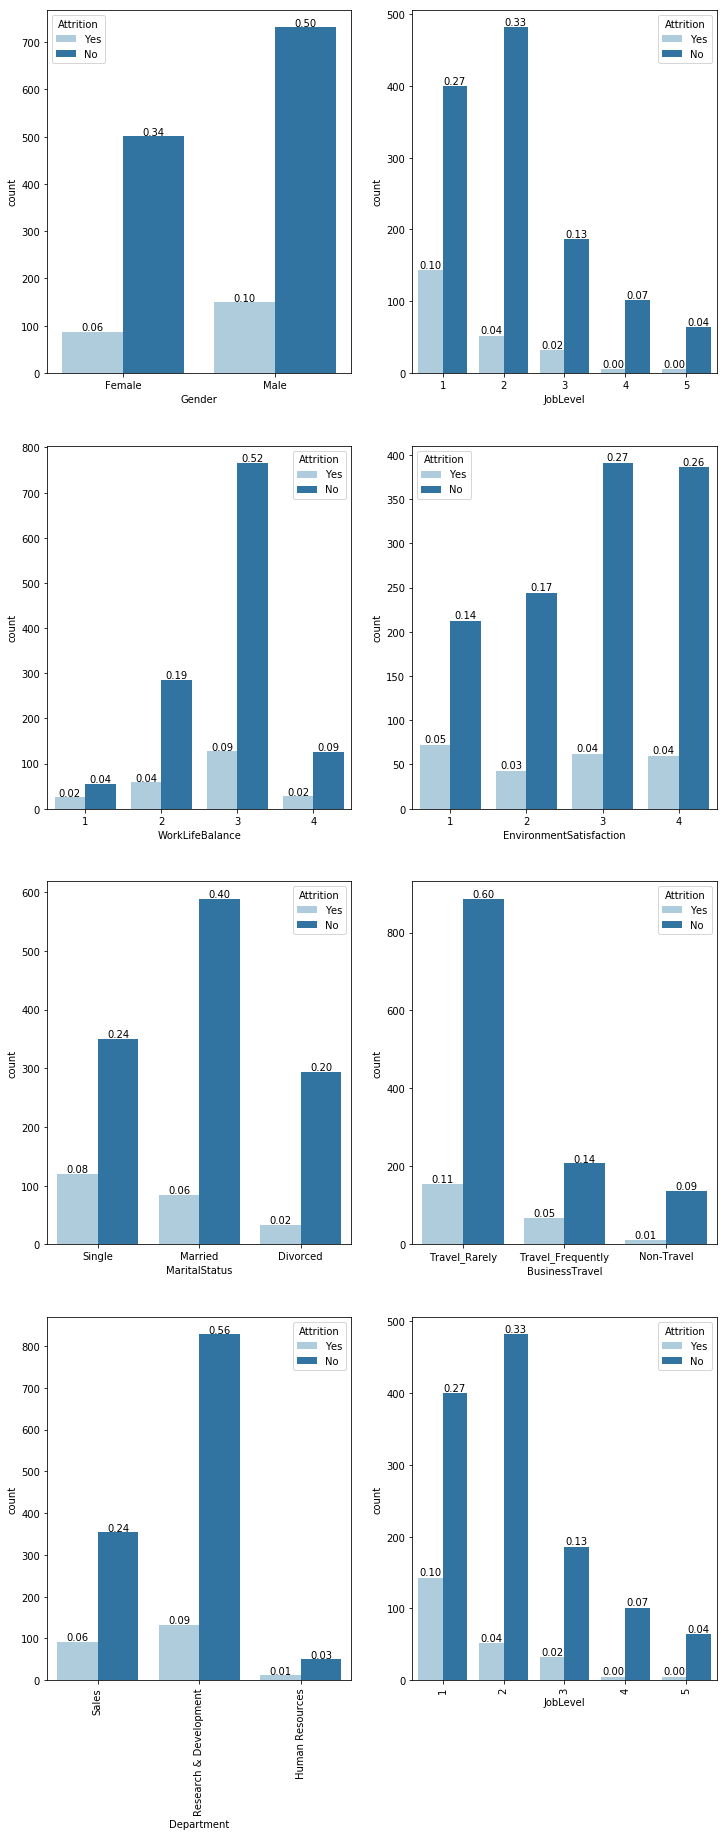

In [24]:
def plot_quit(df):
    '''
    Attrtion "Yes" or "No" in terms of Gender
    Attributes: Gender, JobLevel, WorkLifeBalance, EnvironmentSatisfaction, MaritalStatus,
                BusinessTravel, Department, JobLevel
    '''
    assert isinstance(df,pd.DataFrame)
    total_sample = len(data)
    columns = ['Gender', 'JobLevel','WorkLifeBalance', 'EnvironmentSatisfaction','MaritalStatus','BusinessTravel','Department','JobLevel']
    plt.figure(figsize=(12,8))
    j = 0
    for i in columns:
        j += 1
        plt.subplot(4,2,j)
        #sns.countplot(hrdata[i])
        ax1 = sns.countplot(data = df,x = i,hue="Attrition", palette = "Paired")
        if(j == 8 or j == 7):
            plt.xticks( rotation=90)
        for p in ax1.patches:
            height = p.get_height()
            ax1.text(p.get_x() + p.get_width()/2.,
                    height + 3,
                    '{:1.2f}'.format(height/total_sample,0),
                    ha="center",rotation = 0) 

    # Custom the subplot layout
    plt.subplots_adjust(bottom  =-0.9, top = 2)
    return plt.show()
    
plot_quit(data)

Box Plots for inner relationship between features and MonthlyIncome

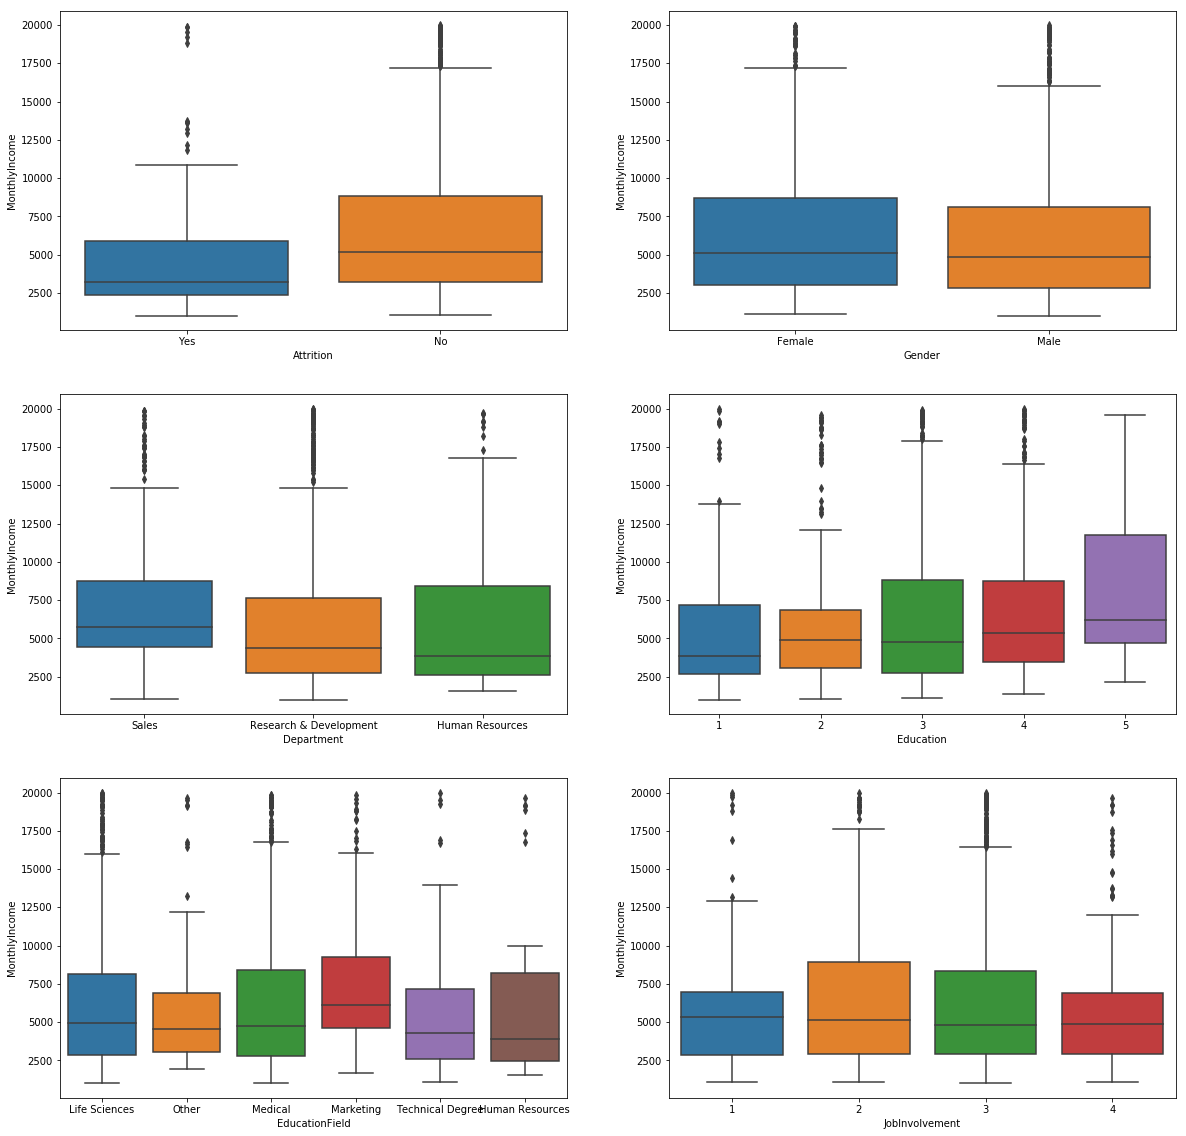

In [91]:
def boxplot(df):
    '''
    MonthlyIncome distribution of Attrition, Gender, Department, Education, EducationField, JobInvolvement
    '''
    assert isinstance(df,pd.DataFrame)
    fig,ax = plt.subplots(3,2,figsize = (20, 20))                        # set boxplot layout as 2 * 3, total size as 20*20

    sns.boxplot(df['Attrition'],df['MonthlyIncome'],ax = ax[0,0])        # boxplot of Attrition
    sns.boxplot(df['Gender'],df['MonthlyIncome'],ax = ax[0,1])           # boxplot of Gender
    sns.boxplot(df['Department'],df['MonthlyIncome'],ax = ax[1,0])       # boxplot of Department
    #plt.xticks(rotation = 90)       
    sns.boxplot(df['Education'],df['MonthlyIncome'],ax = ax[1,1])        # boxplot of Education
    #plt.xticks(rotation = 90)
    sns.boxplot(df['EducationField'],df['MonthlyIncome'],ax = ax[2,0])   # boxplot of EducationField
    sns.boxplot(df['JobInvolvement'],df['MonthlyIncome'],ax = ax[2,1])   # boxplot of JobInvolvement

    return plt.show()

boxplot(data)


Swarm Plot

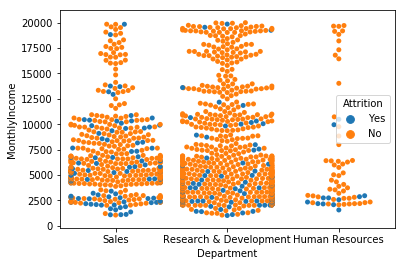

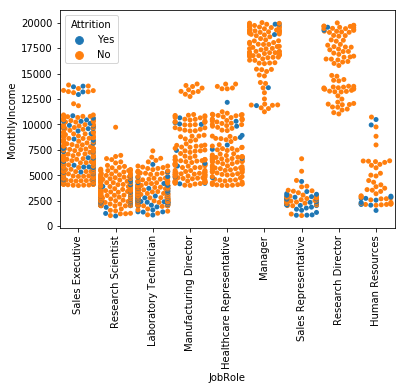

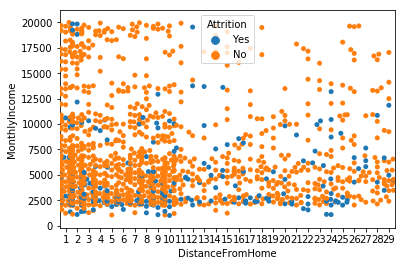

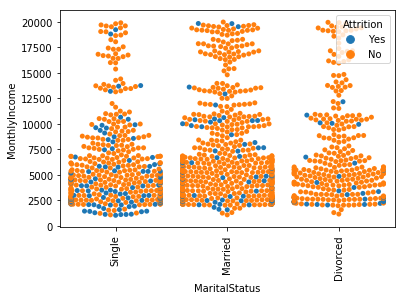

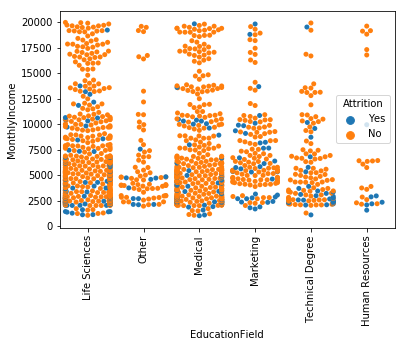

In [32]:
def swarmplot(df):
    '''
    swarmplot distribution under Department, JobRole, JobLevel
    '''
    assert isinstance(df,pd.DataFrame)
    sns.swarmplot(x = 'Department', y = 'MonthlyIncome', hue = 'Attrition',data = df)
    plt.show()

    sns.swarmplot(x = 'JobRole', y = 'MonthlyIncome', hue = 'Attrition',data = df)
    plt.xticks(rotation = 90)
    plt.show()
    
    sns.swarmplot(x = 'DistanceFromHome', y = 'MonthlyIncome', hue = 'Attrition',data = df)
    
    plt.show()
    
    sns.swarmplot(x = 'MaritalStatus', y = 'MonthlyIncome', hue = 'Attrition',data = df)
    plt.xticks(rotation = 90)
    plt.show()

    sns.swarmplot(x = 'EducationField', y = 'MonthlyIncome', hue = 'Attrition',data = df)
    plt.xticks(rotation = 90)
    return plt.show()

    sns.swarmplot(x = 'JobSatisfaction', y = 'MonthlyIncome', hue = 'Attrition',data = df)
    plt.xticks(rotation = 90)
    return plt.show()

swarmplot(data)

Monthly income by age grouped by JobRole

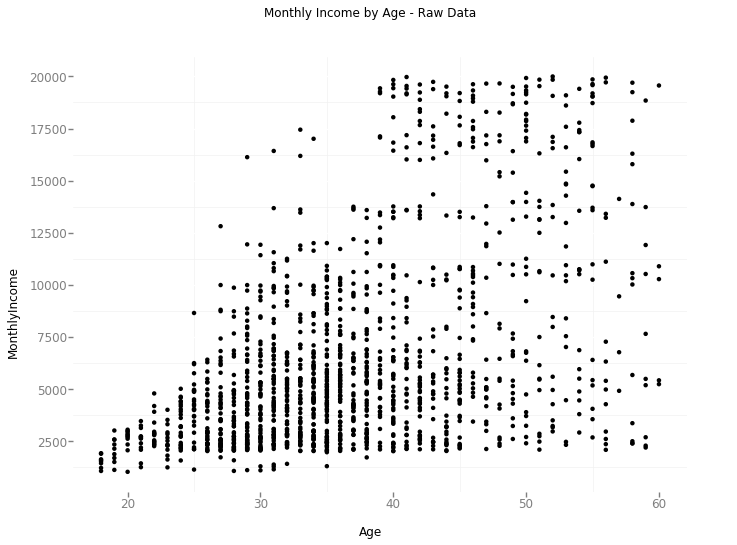

<ggplot: (-9223372036551364783)>

In [94]:
from ggplot import *
def plot(df):
    '''
    ggplot of Monthly Income by age
    x: Age
    y: MonthlyIncome
    '''
    assert isinstance(df,pd.DataFrame)
    plt = ggplot( aes(x='Age', y='MonthlyIncome'), data = df) + \
    geom_point() +\
    theme_bw() + \
    ggtitle('Monthly Income by Age - Raw Data')
    return plt
plot(data)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

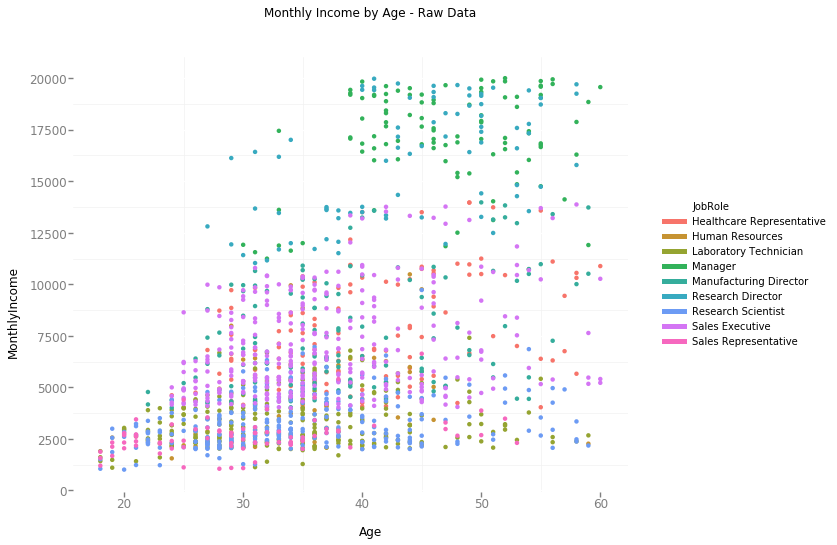

<ggplot: (-9223372036551364657)>

In [95]:
def gg_plot(df):
    '''
    ggplot of Monthly Income by age
    x: Age
    y: MonthlyIncome
    color: JobRole
    '''
    assert isinstance(df,pd.DataFrame)
    plt = ggplot(aes(x ='Age', y='MonthlyIncome',color = 'JobRole'), data = df) + \
    geom_point() +\
    theme_bw() + \
    ggtitle('Monthly Income by Age - Raw Data')
    return plt
gg_plot(data)

# feature importance

In [104]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [105]:
df = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [106]:
df.groupby('BusinessTravel')['Attrition'].value_counts()

BusinessTravel     Attrition
Non-Travel         No           138
                   Yes           12
Travel_Frequently  No           208
                   Yes           69
Travel_Rarely      No           887
                   Yes          156
Name: Attrition, dtype: int64

In [107]:
final  = [df['Attrition']]                               # dataframe of Attrition
df.drop('Attrition', axis=1, inplace=True)    

for col in df.columns:
    print(col)
    if df[col].dtype == 'object':
        print("Reached")                                 # PRINT 
        final.append(pd.get_dummies(df[col], prefix = col,drop_first = True))
    else:
        final.append(df[col])
target = pd.concat(final, axis=1)

Age
BusinessTravel
Reached
DailyRate
Department
Reached
DistanceFromHome
Education
EducationField
Reached
EmployeeCount
EmployeeNumber
EnvironmentSatisfaction
Gender
Reached
HourlyRate
JobInvolvement
JobLevel
JobRole
Reached
JobSatisfaction
MaritalStatus
Reached
MonthlyIncome
MonthlyRate
NumCompaniesWorked
Over18
Reached
OverTime
Reached
PercentSalaryHike
PerformanceRating
RelationshipSatisfaction
StandardHours
StockOptionLevel
TotalWorkingYears
TrainingTimesLastYear
WorkLifeBalance
YearsAtCompany
YearsInCurrentRole
YearsSinceLastPromotion
YearsWithCurrManager


In [108]:
train,test = train_test_split(target)
# train set
x_label = train['Attrition']
x_train = train.drop('Attrition', axis = 1)
# test set
y_label = test['Attrition']
y_train = test.drop('Attrition', axis = 1)
# fit model no training data
model = XGBClassifier()
model.fit(x_train, x_label)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [109]:
# make predictions for test data
y_pred = model.predict(y_train)
accuracy = accuracy_score(y_label, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 86.14%


In [110]:
# plot model features by F-score
model.feature_importances_

array([0.07228915, 0.02560241, 0.00753012, 0.06174699, 0.01807229,
       0.00301205, 0.05572289, 0.        , 0.00301205, 0.01054217,
       0.00753012, 0.        , 0.01054217, 0.        , 0.07831325,
       0.04668675, 0.01054217, 0.02560241, 0.04518072, 0.00451807,
       0.        , 0.01957831, 0.        , 0.00451807, 0.00451807,
       0.00451807, 0.00903614, 0.01506024, 0.04066265, 0.00150602,
       0.00903614, 0.07530121, 0.02710843, 0.03162651, 0.04518072,
       0.01807229, 0.        , 0.03313253, 0.        , 0.03614458,
       0.01355422, 0.01506024, 0.02560241, 0.01807229, 0.0060241 ,
       0.02710843, 0.03313253], dtype=float32)

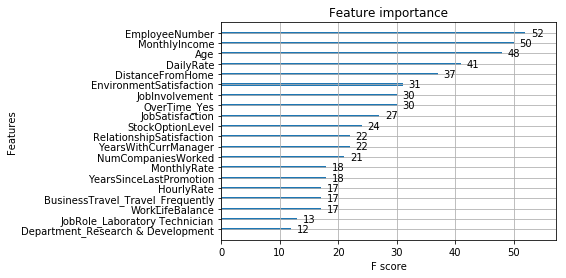

In [111]:
from xgboost import plot_importance
plot_importance(model, max_num_features = 20)

In [112]:
data['left'] = 0 
data['left'][data['Attrition'] == 'Yes'] = 1
x = data['left'] 

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


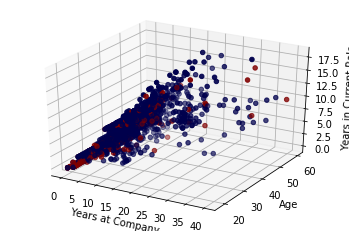

In [116]:
from mpl_toolkits.mplot3d import Axes3D
def threeDimension(df):
    '''
    3D axes plot
    x: YearsAtCompany
    y: Age
    z: YearsInCurrentRole
    s: WorkLifeBalance
    c: left
    '''
    assert isinstance(df, pd.DataFrame)
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    x = data['YearsAtCompany']
    y = data['Age']
    z = data['YearsInCurrentRole']
    s = data['WorkLifeBalance']
    c = data['left']
    cmap = plt.get_cmap('seismic')
    _ = ax.scatter(xs=x, ys=y, zs=z, c=c, cmap=cmap)
    _ = ax.set_xlabel('Years at Company')
    _ = ax.set_ylabel('Age')
    _ = ax.set_zlabel('Years in Current Role')
    _ = plt.title('')
    return plt.show()
threeDimension(df)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


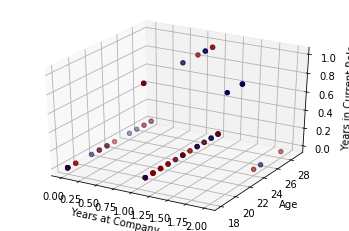

In [118]:
from mpl_toolkits.mplot3d import Axes3D

def threeD(df):
    '''
    3D axes plot
    x: YearsAtCompany
    y: Age
    z: YearsInCurrentRole
    s: WorkLifeBalance
    c: left
    '''
    assert isinstance(df, pd.DataFrame)
    young = df[(df['Age'] < 30) & (df['YearsAtCompany'] <= 2) & (df['YearsInCurrentRole'] <= 1)]
    df['young'] = 0
    df['young'][(df['Age'] < 30) & (df['YearsAtCompany'] <= 2) & (df['YearsInCurrentRole'] <= 1)] = 1

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    x = young['YearsAtCompany']
    y = young['Age']
    z = young['YearsInCurrentRole']
    s = young['WorkLifeBalance']
    c = young['left']
    cmap = plt.get_cmap('seismic')
    _ = ax.scatter(xs=x, ys=y, zs=z, c=c, cmap=cmap)
    _ = ax.set_xlabel('Years at Company')
    _ = ax.set_ylabel('Age')
    _ = ax.set_zlabel('Years in Current Role')
    _ = plt.title('')
    return plt.show()

threeD(data)

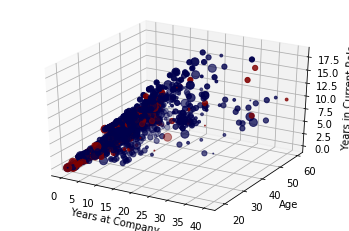

In [115]:
def threeDAxes(df):
    '''
    x: YearsAtCompany
    y: Age
    z: YearsInCurrentRole
    s: WorkLifeBalance
    c: left
    '''
    assert isinstance(df, pd.DataFrame)
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    x = df['YearsAtCompany']
    y = df['Age']
    z = df['YearsInCurrentRole']
    s = df['WorkLifeBalance']
    c = df['left']
    cmap = plt.get_cmap('seismic')
    _ = ax.scatter(xs=x, ys=y, zs=z, c=c, cmap=cmap, s=s ** 3)
    _ = ax.set_xlabel('Years at Company')
    _ = ax.set_ylabel('Age')
    _ = ax.set_zlabel('Years in Current Role')
    _ = plt.title('')
    return plt.show()
threeDAxes(data)